# Gas Station: Train an AI Gas Station gas truck dispatcher using a Simulator of a Gas Station




In [1]:
from lairningdecisions.trainer import AISimAgent
import ray
agent = AISimAgent('gas_station')

In [5]:
sim_config = {
    "SIM_MINUTES": 5 * 24 * 60, # Simulation time in mINUTES
    "ACTION_INTERVAL_MINUTES": 10, # Time in minutes between each action
    "CAR_TANK_SIZE" : 50 , # liters
    "CAR_TANK_LEVEL" : 8 , # Average tank level, with a exponential distribution
    "REFUELING_SPEED" : 1 , # liters / minute
    "TANK_TRUCK_TIME" : 60 , # Minutes it takes the tank truck to arrive
    "MARGIN_PER_LITRE" : 1 , # Marginal earnings per litre, excluding truck transportation fixed cost
    "TRUCK_COST" : 150 , # Fixed Transportation Cost
    "DRIVER_PATIENCE" : 4 , # Avg driver patience in minutes, with a exponential distribution
}
agent.train(iterations=50, sim_config=sim_config)
agent.train(iterations=50, sim_config=sim_config)

# Training Session 1 started at 2021-04-15 19:16:10.332221!
# Progress: 100.0% # Best Mean Reward: 819.81 
# Training Session 1 ended at 2021-04-15 19:46:19.334322!
# Training Session 2 started at 2021-04-15 19:46:19.339173!
# Progress: 100.0% # Best Mean Reward: 786.13 
# Training Session 2 ended at 2021-04-15 20:18:04.077828!


In [6]:
sim_config = {
    "TANK_TRUCK_TIME" : 90 , # Minutes it takes the tank truck to arrive
    "DRIVER_PATIENCE" : 2 , # Avg driver patience in minutes, with a exponential distribution
}
agent.train(iterations=50, sim_config=sim_config)
agent.train(iterations=50, sim_config=sim_config)

# Training Session 3 started at 2021-04-15 20:18:12.126837!
# Progress: 100.0% # Best Mean Reward: 850.91 
# Training Session 3 ended at 2021-04-15 20:50:17.105941!
# Training Session 4 started at 2021-04-15 20:50:17.123345!
# Progress: 100.0% # Best Mean Reward: 842.15 
# Training Session 4 ended at 2021-04-15 21:21:37.983540!


In [7]:
agent.get_sim_config()

,id,name,baseline_avg,config
0,1,Base Config,158.387202,"{""SIM_MINUTES"": 7200, ""ACTION_INTERVAL_MINUTES..."
1,2,Config 1,161.346268,"{""SIM_MINUTES"": 7200, ""ACTION_INTERVAL_MINUTES..."


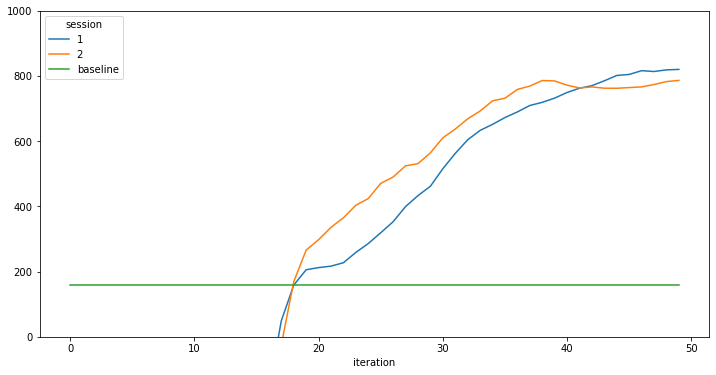

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
agent.get_training_data(baseline=True, sim_config=1).plot(figsize=(12,6))
plt.ylim(bottom=-0,top=1000)
plt.show()

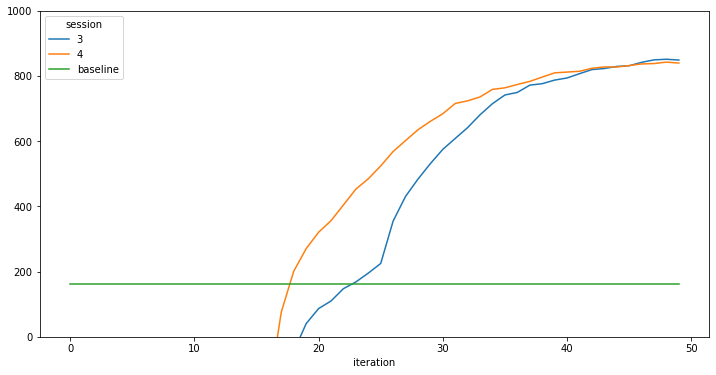

In [14]:
agent.get_training_data(baseline=True, sim_config=2).plot(figsize=(12,6))
plt.ylim(bottom=-0,top=1000)
plt.show()

In [15]:
agent.get_policies()

,sim_config,policy,session
0,1,1,1
1,1,2,2
2,2,3,3
3,2,4,4


In [17]:
agent.run_policies(simulations=50)

# Running AI Policy 1 started at 2021-04-15 21:39:56.534133!
# Progress: 100.0% 
# Running AI Policy 1 ended at 2021-04-15 21:41:48.978984!
# Running AI Policy 2 started at 2021-04-15 21:41:48.979083!
# Progress: 100.0% 
# Running AI Policy 2 ended at 2021-04-15 21:43:44.942787!
# Running AI Policy 3 started at 2021-04-15 21:43:44.953855!
# Progress: 100.0% 
# Running AI Policy 3 ended at 2021-04-15 21:45:56.918163!
# Running AI Policy 4 started at 2021-04-15 21:45:56.918302!
# Progress: 100.0% 
# Running AI Policy 4 ended at 2021-04-15 21:48:01.661476!


In [18]:
agent.run_baselines(simulations=50, sim_config=1)

# Baseline Simulation for Config 1 started at 2021-04-15 21:49:52.150521!
# Baseline Simulation for Config 1 ended at 2021-04-15 21:49:57.615721!


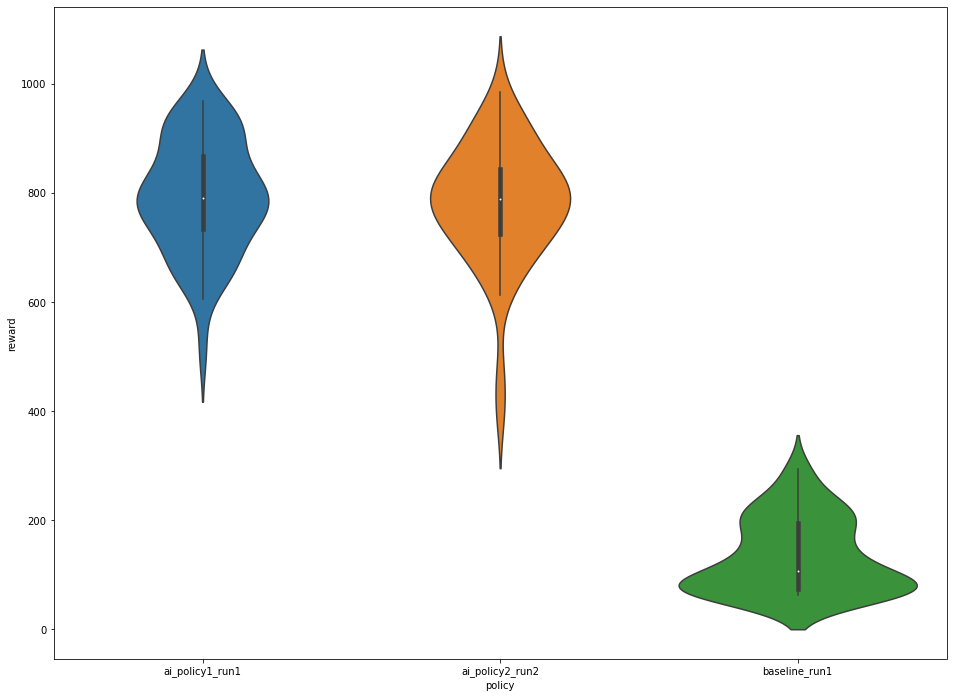

In [19]:
df = agent.get_policy_run_data(sim_config=1)
plt.figure(figsize=(16,12))
sn.violinplot(x="policy", y="reward", data=df, showfliers = False)
plt.show()

In [20]:
agent.run_baselines(simulations=50, sim_config=2)

# Baseline Simulation for Config 2 started at 2021-04-15 21:50:22.120010!
# Baseline Simulation for Config 2 ended at 2021-04-15 21:50:24.945051!


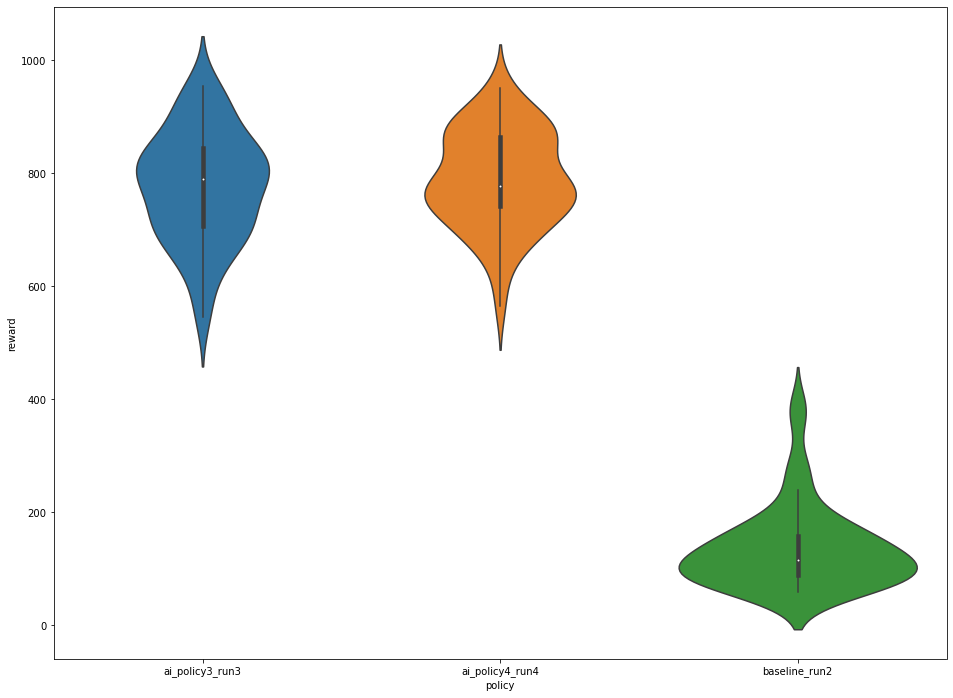

In [21]:
df = agent.get_policy_run_data(sim_config=2)
plt.figure(figsize=(16,12))
sn.violinplot(x="policy", y="reward", data=df, showfliers = False)
plt.show()